# LAB --- Clasificación del conjunto artificial de datos de los dos círculos usando regresión logística

Construya un modelo de regresión logística para el conjunto artificial de datos generado a continuación y grafique las fronteras de decisión.

**Ayuda**: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

In [1]:
import warnings

warnings.filterwarnings("ignore")

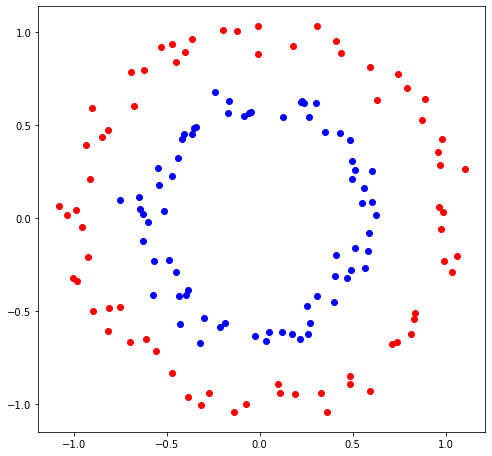

In [3]:
#
# Generación de los datos
#
from sklearn.datasets import make_circles

NPOINTS = 140

X, y = make_circles(
    n_samples=NPOINTS, 
    shuffle=False, 
    noise=0.06, 
    random_state=12345,
    factor=0.6)

#
# Graficación
#
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(X[:70,0], X[:70,1], color='red')
plt.scatter(X[70:,0], X[70:,1], color='blue')
plt.gca().set_aspect('equal', adjustable='box')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [38]:
scaler = StandardScaler()
XS = scaler.fit_transform(X)
poly= PolynomialFeatures(5)
X_NEW= poly.fit_transform(XS)


In [35]:
from sklearn.metrics import log_loss

logisticRegression = LogisticRegression(
    penalty="none",      # ‘l1’, ‘l2’, ‘elasticnet’, ‘none’
    tol=0.0001,          # stop criteria
    C=1.0,               # factor inverso para regularizacion (SVM)
    fit_intercept=True,  #
    class_weight=None,   # None, dict or ‘balanced’
    random_state=None,   #
    solver="lbfgs",      # 'newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
    max_iter=100,        #
    multi_class="auto",  # ‘ovr’, ‘multinomial’, ‘auto’
    verbose=0,           #
    warm_start=False,    # ?re-usa la solución previa
    l1_ratio=None,       # Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1
)

logisticRegression.fit(X_NEW, y)

y_pred=logisticRegression.predict(X_NEW)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
cm=confusion_matrix(y, y_pred)
cm

array([[70,  0],
       [ 0, 70]])

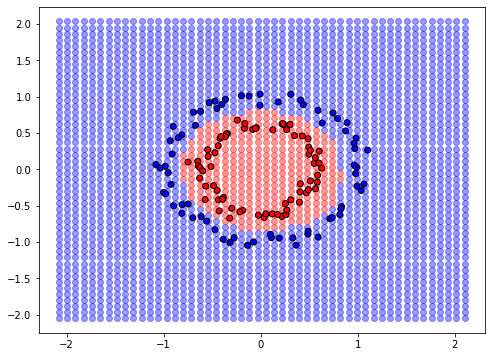

In [32]:

myColorMap = ListedColormap(['blue', 'red'])                    

plt.figure(figsize=(8,6))
# Set min and max values and give it some padding
x1_min, x1_max = X[:,0].min() - 1, X[ :,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[ :,1].max() + 1

xx1 =np.linspace(x1_min, x1_max, 50)
xx2 =np.linspace(x2_min, x2_max, 50)
#Plot Prediction Data
for i in range(len(xx1)):
    for j in range(len(xx2)):
        newX=(np.column_stack((xx1[i],xx2[j])))               
        
        newY = logisticRegression.predict(poly.fit_transform(scaler.transform(newX)))
        yColor=myColorMap(int(newY))
        plt.scatter(xx1[i].flatten(),xx2[j].flatten(),color=yColor,alpha=0.4);

#Plot Training data
plt.scatter(X[:,0].flatten(),X[:,1].flatten(), c=y.flatten(),  cmap=myColorMap,edgecolor='k');
plt.show()

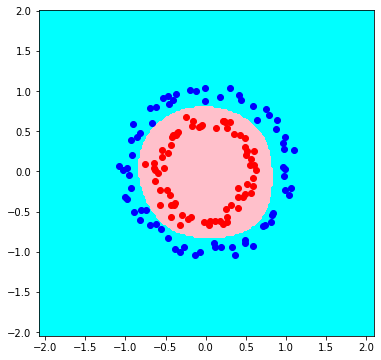

In [47]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap([ 'cyan', 'pink'])
cmap_bold = ['darkorange', 'c']



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = logisticRegression.predict(poly.fit_transform(scaler.transform(np.c_[xx.ravel(), yy.ravel()])))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:70,0], X[:70,1], color='blue')
plt.scatter(X[70:,0], X[70:,1], color='red')
plt.gca().set_aspect('equal', adjustable='box')